# Desafio 7- Arboles de Regresión

* Para esta sesión trabajremos con una base de datos sobre los precios d einmuebles en la ciudad de Ames, Iowa. La base se compone de 2930 registros y contiene un gran úmero de atributos. 
* Nuestro objetivo es generer un modelo que prediga de forma adecuada los precios de inmuebles, medidos con la variable Sale_Price

# Ejercicio 1 - Preparación del Ambiente de Trabajo

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler, LabelEncoder    
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score  
from sklearn.tree import DecisionTreeRegressor             
from sklearn.model_selection import GridSearchCV       

pd.set_option('display.max_columns', 500)
plt.style.use('seaborn')

df = pd.read_csv("ames_housing.csv").drop("Unnamed: 0", axis=1)

df.shape

(2930, 81)

* 81 atributos y 2930 registros.

In [133]:
df.head()

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,Land_Slope,Neighborhood,Condition_1,Condition_2,Bldg_Type,House_Style,Overall_Qual,Overall_Cond,Year_Built,Year_Remod_Add,Roof_Style,Roof_Matl,Exterior_1st,Exterior_2nd,Mas_Vnr_Type,Mas_Vnr_Area,Exter_Qual,Exter_Cond,Foundation,Bsmt_Qual,Bsmt_Cond,Bsmt_Exposure,BsmtFin_Type_1,BsmtFin_SF_1,BsmtFin_Type_2,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,Heating,Heating_QC,Central_Air,Electrical,First_Flr_SF,Second_Flr_SF,Low_Qual_Fin_SF,Gr_Liv_Area,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Kitchen_Qual,TotRms_AbvGrd,Functional,Fireplaces,Fireplace_Qu,Garage_Type,Garage_Finish,Garage_Cars,Garage_Area,Garage_Qual,Garage_Cond,Paved_Drive,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,Three_season_porch,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,Gtl,North_Ames,Norm,Norm,OneFam,One_Story,Above_Average,Average,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112,Typical,Typical,CBlock,Typical,Good,Gd,BLQ,2,Unf,0,441,1080,GasA,Fair,Y,SBrkr,1656,0,0,1656,1,0,1,0,3,1,Typical,7,Typ,2,Good,Attchd,Fin,2,528,Typical,Typical,Partial_Pavement,210,62,0,0,0,0,No_Pool,No_Fence,None,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,Gtl,North_Ames,Feedr,Norm,OneFam,One_Story,Average,Above_Average,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0,Typical,Typical,CBlock,Typical,Typical,No,Rec,6,LwQ,144,270,882,GasA,Typical,Y,SBrkr,896,0,0,896,0,0,1,0,2,1,Typical,5,Typ,0,No_Fireplace,Attchd,Unf,1,730,Typical,Typical,Paved,140,0,0,0,120,0,No_Pool,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,Gtl,North_Ames,Norm,Norm,OneFam,One_Story,Above_Average,Above_Average,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108,Typical,Typical,CBlock,Typical,Typical,No,ALQ,1,Unf,0,406,1329,GasA,Typical,Y,SBrkr,1329,0,0,1329,0,0,1,1,3,1,Good,6,Typ,0,No_Fireplace,Attchd,Unf,1,312,Typical,Typical,Paved,393,36,0,0,0,0,No_Pool,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,Gtl,North_Ames,Norm,Norm,OneFam,One_Story,Good,Average,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0,Good,Typical,CBlock,Typical,Typical,No,ALQ,1,Unf,0,1045,2110,GasA,Excellent,Y,SBrkr,2110,0,0,2110,1,0,2,1,3,1,Excellent,8,Typ,2,Typical,Attchd,Fin,2,522,Typical,Typical,Paved,0,0,0,0,0,0,No_Pool,No_Fence,None,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,OneFam,Two_Story,Average,Average,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0,Typical,Typical,PConc,Good,Typical,No,GLQ,3,Unf,0,137,928,GasA,Good,Y,SBrkr,928,701,0,1629,0,0,2,1,3,1,Typical,6,Typ,1,Typical,Attchd,Fin,2,482,Typical,Typical,Paved,212,34,0,0,0,0,No_Pool,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.638933,42.060899


# Ejercicio 2 - Feature Engineering

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
MS_SubClass           2930 non-null object
MS_Zoning             2930 non-null object
Lot_Frontage          2930 non-null int64
Lot_Area              2930 non-null int64
Street                2930 non-null object
Alley                 2930 non-null object
Lot_Shape             2930 non-null object
Land_Contour          2930 non-null object
Utilities             2930 non-null object
Lot_Config            2930 non-null object
Land_Slope            2930 non-null object
Neighborhood          2930 non-null object
Condition_1           2930 non-null object
Condition_2           2930 non-null object
Bldg_Type             2930 non-null object
House_Style           2930 non-null object
Overall_Qual          2930 non-null object
Overall_Cond          2930 non-null object
Year_Built            2930 non-null int64
Year_Remod_Add        2930 non-null int64
Roof_Style            2930 non-null o

Recodificación K-1 en cada variable.

In [135]:
for index, values in enumerate(df.columns):
    if (df[values].dtype == np.object):
        temp = pd.get_dummies(df[values],
                              drop_first=True,
                              dtype="int64",
                              prefix=values)
        df = pd.concat([df, temp], axis=1)
        df = df.drop(columns=[values])
        
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Columns: 307 entries, Lot_Frontage to Sale_Condition_Partial
dtypes: float64(2), int64(305)
memory usage: 6.9 MB


# Ejercicio 3 - Primer Modelo

Separar muestras de entrenamiento y testing.

In [136]:
def df_cols_lists(df,
                     y_name=[],
                     n_cols=4,
                     colors_list=[
                         "navy", "firebrick", "goldenrod", "forestgreen",
                         "darkcyan", "darkmagenta"
                     ],
                     return_graph_vars=False):
    var_list = []
    for index, values in enumerate(df):
        var_list.append(df.columns[index])
    x_list = []
    x_list = var_list.copy()
    if y_name != [] and y_name != [""] and y_name != None:
        if type(y_name) == np.str:
            x_list.remove(y_name)
        elif len(y_name) == 1:
            y_name = str(y_name[0])
            x_list.remove(y_name)
        else:
            for index, values in enumerate(y_name):
                x_list.remove(y_name[index])
    tr_rows = int(np.ceil(len(var_list) / n_cols))
    rows_rest = len(var_list) % n_cols
    n_rows = tr_rows + rows_rest

    g_colors_list = [
        "navy", "firebrick", "goldenrod", "forestgreen", "darkcyan",
        "darkmagenta"
    ] * tr_rows
    if (return_graph_vars == False):
        return x_list
    else:
        return x_list, g_colors_list, n_rows, var_list


In [137]:
y_name = "Sale_Price"
X_list = df_cols_lists(df, y_name)
X_train, X_test, y_train, y_test = train_test_split(df[X_list],
                                                    df[y_name],
                                                    test_size=0.33,
                                                    random_state=1781)

Entrenamiento del arbol de regresión

In [138]:
regression_tree = DecisionTreeRegressor(random_state=666).fit(X_train, y_train)

Métricas de desempeño

In [139]:
mse = mean_squared_error(y_test,regression_tree.predict(X_test)).round(2)
mae = median_absolute_error(y_test,regression_tree.predict(X_test)).round(2)
r2  = r2_score(y_test, regression_tree.predict(X_test)).round(3)

In [140]:
print("Test MSE:", mse)
print("Test MAE:", mae)
print("Test R2: ", r2)

Test MSE: 1631177349.98
Test MAE: 17500.0
Test R2:  0.746


 Se observan valores de MSE y MAE bastante altos, además, el modelo presenta un 74,6% de explicación de la varianza de los datos.

# Ejercicio 4 - Importancia Relative

In [141]:
def plot_importance(df, model, feat_names):
    tmp_df = df.copy()
    tmp_importance = model.feature_importances_
    sort_importance = np.argsort(tmp_importance)[::-1]
    names = [feat_names[i] for i in sort_importance]
    tmp_attr = pd.DataFrame({'name': names, 'score': tmp_importance[sort_importance]})
    tmp_attr_filt=tmp_attr[tmp_attr['score']>=0.001]
    plt.figure(figsize=(10,10))
    sns.barplot(x='score', y='name', data=tmp_attr_filt, color='dodgerblue')
    plt.title(f'Importancia relativa de los primeros {tmp_attr_filt.shape[0]} atributos')

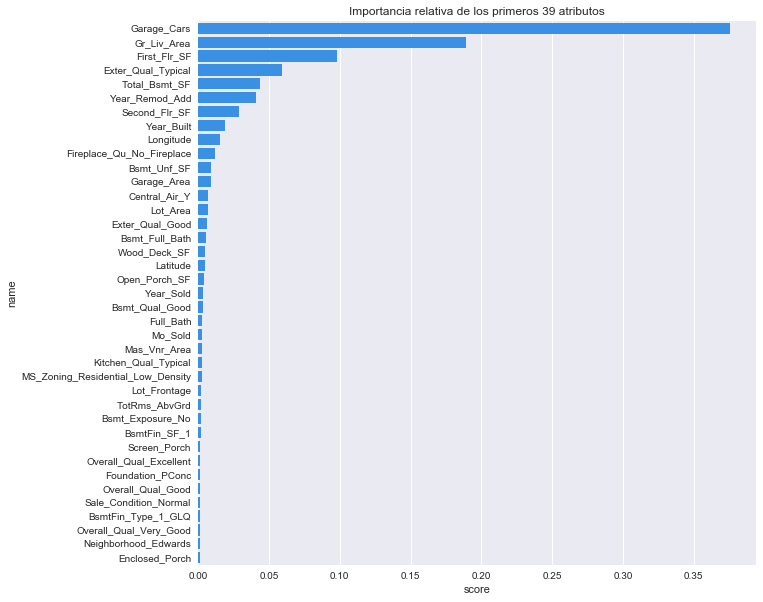

In [142]:
plot_importance(df,regression_tree,X_list)

* Podemos ver que el atributo con una mayor importancia para el precio del inmueble es Garage_Cars, seguido por Gr_Liv_Area.
* Con un peso menor a 0.1 se encuentra First_Floor_SF y Exter_Qual_Typical
* Todas las otras variables tiene un peso inferior a 0.05 

In [143]:
def infer_k_features(df, model, feat_names, k_feats=10):
    tmp_df = df.copy()
    tmp_importance = model.feature_importances_

    sort_importance = np.argsort(tmp_importance)[::-1]
    names = [feat_names[i] for i in sort_importance]
    tmp_attr = pd.DataFrame(
        {'name': names,
         'score': tmp_importance[sort_importance]}
    )
    tmp_attr = tmp_attr[:k_feats]['name']
    tmp_df = tmp_df[
        tmp_df.columns[
            tmp_df.columns.isin(tmp_attr)
        ]
    ]
    return tmp_df

Primeros 10 atributos

In [144]:
df10atributos = infer_k_features(df, regression_tree, X_list, k_feats=10)
df10atributos.sample(5)

,Year_Built,Year_Remod_Add,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Garage_Cars,Longitude,Exter_Qual_Typical,Fireplace_Qu_No_Fireplace
305,1900,1950,859,859,319,1178,1,-93.606593,1,1
2536,1968,1968,833,898,0,898,1,-93.628069,1,1
2832,2004,2004,976,976,732,1708,2,-93.669924,0,1
1841,2006,2007,625,625,625,1250,2,-93.646478,0,1
946,2000,2001,1107,1040,1012,2052,3,-93.606944,0,0


* Se separan los 10 atributos en una nueva base de datos, junto con el vector objetivo.

In [145]:
df10atributos = pd.concat([df[y_name], df10atributos], axis=1)

df10atributos.head()

,Sale_Price,Year_Built,Year_Remod_Add,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Garage_Cars,Longitude,Exter_Qual_Typical,Fireplace_Qu_No_Fireplace
0,215000,1960,1960,1080,1656,0,1656,2,-93.619754,1,0
1,105000,1961,1961,882,896,0,896,1,-93.619756,1,1
2,172000,1958,1958,1329,1329,0,1329,1,-93.619387,1,1
3,244000,1968,1968,2110,2110,0,2110,2,-93.617320,0,0
4,189900,1997,1998,928,928,701,1629,2,-93.638933,1,0


# Ejercicio 5 - Refactrorización del modelo y pickling

Generamos conjuntos de entrenamiento y testing

In [146]:
X_list10 = df_cols_lists(df10atributos, y_name)
X_train10, X_test10, y_train10, y_test10 = train_test_split(df10atributos[X_list10],
                                                            df10atributos[y_name],
                                                            test_size=0.33,
                                                            random_state=1781)
reg_tree10 = DecisionTreeRegressor(random_state=1781).fit(X_train10, y_train10)

GridSearch DecisionTreeRegressor

In [147]:
max_features_range = list(range(1, X_train10.shape[1] + 1))

dec_tree_grid_cv = GridSearchCV(
    DecisionTreeRegressor(random_state=666),
    {
        "criterion": ["mse"],
        "max_depth": np.linspace(1, 32, 32),
        "max_features": max_features_range
    },
    cv=5)

Entrenamos el modelo

In [148]:
dec_tree_grid_cv.fit(X_train10, y_train10)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=666,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['mse'],
                         'max_depth': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23.,

In [149]:
print('La combinación de hipermaprámetros que presentó un mejor desempeño fue:\n')
for i in dec_tree_grid_cv.best_params_:
    print(f'{i.title()}: {dec_tree_grid_cv.best_params_[i]}')
print(f'\nQue presentó un score de: {round(dec_tree_grid_cv.best_score_,3)}')


La combinación de hipermaprámetros que presentó un mejor desempeño fue:

Criterion: mse
Max_Depth: 9.0
Max_Features: 6

Que presentó un score de: 0.794


Métricas

In [150]:
mse_10 = mean_squared_error(y_test10,dec_tree_grid_cv.predict(X_test10)).round(2)
mae_10 = median_absolute_error(y_test10,dec_tree_grid_cv.predict(X_test10)).round(2)
r2_10  = r2_score(y_test10, dec_tree_grid_cv.predict(X_test10)).round(3)

In [151]:
print("Test MSE:", mse_10)
print("Test MAE:", mae_10)
print("Test R2:", r2_10)

Test MSE: 1470567321.28
Test MAE: 15821.28
Test R2: 0.771


In [152]:
comparacion = pd.DataFrame({'Modelo':['Modelo Por defecto','Modelo Refactorizado'], 
                        'MSE':[mse, mse_10],
                        'MAE':[mae, mae_10],
                        'R2':[r2, r2_10]})
print('Comparativa de métricas de ambos modelos:')
comparacion


Comparativa de métricas de ambos modelos:


,Modelo,MSE,MAE,R2
0,Modelo Por defecto,1.631177e+09,17500.00,0.746
1,Modelo Refactorizado,1.470567e+09,15821.28,0.771


El modelo Refactorizado presenta un mejor desempeño que el modelo por defecto, disminuyendo su MSE y su MAE, además de aumentar su r2.

# Pickling

In [153]:
import pickle

In [154]:
pickle_out = open('ModeloTarea7TomásSolis.sav','wb')
pickle.dump(dec_tree_grid_cv, pickle_out)
pickle.dump(X_train10, pickle_out)
pickle.dump(X_test10, pickle_out)
pickle.dump(y_train10, pickle_out)
pickle.dump(y_test10, pickle_out)
pickle_out.close()